<a href="https://colab.research.google.com/github/Uluc/nyse_nasdaq_stock_analysis/blob/main/stock_analysis_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
!pip install databricks

     |████████████████████████████████| 212.3MB 80kB/s 
     |████████████████████████████████| 204kB 55.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=95be679d5f8f05bf7767e38f8c21b37790d2f4536b5be20a548c433cabccbf69
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [ ]:
!pip install koalas

     |████████████████████████████████| 1.4MB 12.4MB/s 


In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from  pyspark.sql.functions import input_file_name

import databricks.koalas as ks

import numpy as np

from pyspark.sql.functions import col, min, lag, when
from pyspark.sql import functions as func
from pyspark.sql.window import Window
from pyspark.sql import SQLContext 
ks.set_option('compute.ops_on_diff_frames', True)

In [ ]:
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

arg1 = 'AAPL.csv'
df = spark.read.format('csv').options(header='true').load(arg1)
if df.count() > 1000
df = df.orderBy(col("date").asc())
df.show()
name = arg1.split(".")[0]
print(numrecord)
name

+----------+---------+------------------+------------------+------------------+------------------+-------------------+
|      date|   volume|              open|              high|               low|             close|           adjclose|
+----------+---------+------------------+------------------+------------------+------------------+-------------------+
|1980-12-12|117258400|0.5133928656578064|          0.515625|0.5133928656578064|0.5133928656578064|0.40568336844444275|
|1980-12-15| 43971200|0.4888392984867096|0.4888392984867096|0.4866071343421936|0.4866071343421936| 0.3845173120498657|
|1980-12-16| 26432000|          0.453125|          0.453125|0.4508928656578064|0.4508928656578064| 0.3562958240509033|
|1980-12-17| 21610400|0.4620535671710968|0.4642857015132904|0.4620535671710968|0.4620535671710968| 0.3651150166988373|
|1980-12-18| 18362400|0.4754464328289032|0.4776785671710968|0.4754464328289032|0.4754464328289032| 0.3756980895996094|
|1980-12-19| 12157600|0.5044642686843872|0.50669

'AAPL'

In [ ]:
windowSpec = Window.orderBy('date').rowsBetween(-19,0)
df = df.withColumn('open_20SMA', func.avg("open").over(windowSpec)) 

windowSpec = Window.orderBy('date').rowsBetween(-49,0)
df = df.withColumn('open_50SMA', func.avg("open").over(windowSpec)) 

windowSpec = Window.orderBy('date').rowsBetween(-99,0)
df = df.withColumn('open_100SMA', func.avg("open").over(windowSpec)) 

windowSpec = Window.orderBy('date').rowsBetween(-199,0)
df = df.withColumn('open_200SMA', func.avg("open").over(windowSpec)) 

windowSpec = Window.orderBy('date').rowsBetween(-364,0)
df = df.withColumn('open_365SMA', func.avg("open").over(windowSpec)) 
df.tail(20)



[Row(date='2020-06-05', volume='34312600', open='323.3500061035156', high='331.75', low='323.2300109863281', close='331.5', adjclose='331.5', open_20SMA=315.72250213623045, open_50SMA=290.0452005004883, open_100SMA=292.57160079956054, open_200SMA=270.58969985961915, open_365SMA=232.38945187085295),
 Row(date='2020-06-08', volume='23913600', open='330.25', high='333.6000061035156', low='327.32000732421875', close='333.4599914550781', adjclose='333.4599914550781', open_20SMA=316.95300140380857, open_50SMA=291.71980041503906, open_100SMA=292.70710067749025, open_200SMA=271.1759998321533, open_365SMA=232.88835599716396),
 Row(date='2020-06-09', volume='36928100', open='332.1400146484375', high='345.6099853515625', low='332.010009765625', close='343.989990234375', adjclose='343.989990234375', open_20SMA=318.1550018310547, open_50SMA=293.30760070800784, open_100SMA=292.91000076293943, open_200SMA=271.77074989318845, open_365SMA=233.3920272618124),
 Row(date='2020-06-10', volume='41662900', o

In [ ]:
windowSpec = Window.orderBy('date').rowsBetween(-19,0)
df = df.withColumn("upper_band", (func.avg("open").over(windowSpec) + 2*func.stddev("open").over(windowSpec)))
df = df.withColumn("middle_band", (func.avg("open").over(windowSpec)))
df = df.withColumn("lower_band", (func.avg("open").over(windowSpec) - 2*func.stddev("open").over(windowSpec)))

In [ ]:
df.tail(20)

[Row(date='2020-06-05', volume='34312600', open='323.3500061035156', high='331.75', low='323.2300109863281', close='331.5', adjclose='331.5', open_20SMA=315.72250213623045, open_50SMA=290.0452005004883, open_100SMA=292.57160079956054, open_200SMA=270.58969985961915, open_365SMA=232.38945187085295, upper_band=329.27407154027577, middle_band=315.72250213623045, lower_band=302.1709327321851, BBW=328.3169939462251, intraday_intensity_index=2.743349318667456e-08, H-L=8.519989013671875, yesterday_high='325.6199951171875', yesterday_low='320.7799987792969', yesterday_close='322.32000732421875', TR=9.42999267578125, +DX=6.1300048828125, -DX=0.0),
 Row(date='2020-06-08', volume='23913600', open='330.25', high='333.6000061035156', low='327.32000732421875', close='333.4599914550781', adjclose='333.4599914550781', open_20SMA=316.95300140380857, open_50SMA=291.71980041503906, open_100SMA=292.70710067749025, open_200SMA=271.1759998321533, open_365SMA=232.88835599716396, upper_band=331.1057246271637,

In [ ]:
df = df.withColumn("intraday_intensity_index", ((df['close']*2) - df["high"] - df['low'])/ ((df["high"] - df["low"]) * df["volume"]))
df = df.dropna()
df.count()

9944

In [ ]:
signal_count = 0
overbought = 0
oversold = 0

list_50SMA = np.array(df.select('open_50SMA').collect())
list_200SMA = np.array(df.select('open_200SMA').collect())
date_list = np.array(df.select('date').collect())


last_50 = list_50[0]
last_200 = list_200[0]
list_50SMA = list_50[1:]
list_200SMA = list_200[1:]


for i, (x,y) in enumerate(zip(list_50SMA,list_200SMA)):

  if (last_50 > last_200):
    if (x < y):
      print("Bearish Signal: Death Cross")
      print(date_list[i])
      signal_count += 1
  elif (last_50 < last_200):
    if (x > y):
      print("Bullish Signal: Golden Cross")
      print(date_list[i])
      signal_count += 1
      
  last_50 = x
  last_200 = y

list_RSI = data["RSI_SMA"].to_numpy()

for i, x in enumerate(list_RSI):

  if (x > 70):
      overbought += 1
  elif (x<30):
      oversold += 1

print(overbought)
print(oversold)

In [ ]:
from pyspark.sql.functions import udf

alpha = 1/21

df = df.withColumn("H-L", (df["high"] - df["low"]))
w = Window().partitionBy().orderBy(col("date").asc())
df = df.withColumn("yesterday_high", func.lag("high").over(w))
df = df.withColumn("yesterday_low", func.lag("low").over(w))
df = df.withColumn("yesterday_close", func.lag("close").over(w))
df = df.withColumn("H-C", func.abs(df["high"]- df["yesterday_close"]))
df = df.withColumn("L-C", func.abs(df["low"]- df["yesterday_close"]))
df = df.withColumn("TR", func.greatest("H-C", "L-C", "H-L"))


df = df.withColumn("H-pH",df["high"]-df["yesterday_high"])
df = df.withColumn("pL-L",df["yesterday_low"]-df["low"])

df = df.withColumn('+DX', when((df['H-pH'] > df['pL-L']) & (df['H-pH']>0), df["H-pH"]).otherwise(0.0))
df = df.withColumn('-DX', when((df['H-pH'] < df['pL-L']) & (df['pL-L']>0), df["pL-L"]).otherwise(0.0))

df = df.drop("H-pH").drop("pL-L").drop("H-C").drop("L-C")

# data = df.toPandas()

data = df.select(col("close"), col("open"), col("volume"), col("TR"), col("+DX"), col("-DX"), col("high"), col("low"), col("date"), 
                 col("open_50SMA"), col("open_200SMA"), col("open_100SMA"), col("intraday_intensity_index"), col("upper_band"), col("lower_band"), col("middle_band")).toPandas()

data["close"] = data["close"].astype("float")
data["open"] = data["open"].astype("float")
data["volume"] = data["volume"].astype("float")

data["open_12EMA"] = data['open'].ewm(span=12).mean()
data["open_26EMA"] = data['open'].ewm(span=26).mean()

data['ATR'] = data['TR'].ewm(alpha=alpha, adjust=False).mean()
data['S+DM'] = data['+DX'].ewm(alpha=alpha, adjust=False).mean()
data['S-DM'] = data['-DX'].ewm(alpha=alpha, adjust=False).mean()


data['+DMI'] = (data['S+DM']/data['ATR'])*100
data['-DMI'] = (data['S-DM']/data['ATR'])*100

#delete unnecesary rows
del data['S+DM'], data['S-DM']

# ADX
data['DX'] = (np.abs(data['+DMI'] - data['-DMI'])/(data['+DMI'] + data['-DMI']))*100
data['ADX'] = data['DX'].ewm(alpha=alpha, adjust=False).mean()

del data['DX'], data['ATR'], data['TR'], data['-DX'], data['+DX'], data['+DMI'], data['-DMI']

data['obv'] = np.where(data['close'] > data['close'].shift(1), data['volume'], np.where(data['close'] < data['close'].shift(1), -data['volume'], data.iloc[0]['volume'])).cumsum()

# Moving Average Convergence Divergence (MACD)
data["MACD"] = data["open_12EMA"] - data["open_26EMA"]
# MACD signal line is a 9 day EMA
data["MACD_signal_line"] = data['MACD'].ewm(span=9).mean()

data["stochastic_oscillator"] = ((data["open"] - data["open"].rolling(14).min()) /
                                (data["open"].rolling(14).max() - data["open"].rolling(14).min())) * 100

data["so_3SMA"] = data["stochastic_oscillator"].rolling(window=3).mean()
data["RSI_SMA"] = 100.0 - (100.0 / (1.0 + RS2))
data = data.dropna()
data.tail(10)

,close,open,volume,high,low,date,open_50SMA,open_200SMA,open_100SMA,intraday_intensity_index,upper_band,lower_band,middle_band,open_12EMA,open_26EMA,ADX,obv,MACD,MACD_signal_line,stochastic_oscillator,so_3SMA,RSI_SMA
9934,349.720001,354.640015,66119000.0,356.55999755859375,345.1499938964844,2020-06-19,308.656001,277.40630,295.523801,-3.008927e-09,361.693757,303.562246,332.628001,342.532391,329.580502,30.320979,4.881235e+10,12.951890,11.818104,98.517502,96.172509,70.780573
9935,358.869995,351.339996,33861300.0,359.4599914550781,351.1499938964844,2020-06-22,310.308801,278.10300,295.792701,2.533876e-08,363.481979,305.331025,334.406502,343.887407,331.192316,30.429509,4.884621e+10,12.695091,11.993501,88.018871,92.178799,73.315650
9936,366.529999,364.000000,53038900.0,372.3800048828125,362.2699890136719,2020-06-23,312.222601,278.85275,296.227301,-2.965171e-09,367.855200,305.007804,336.431502,346.981652,333.622515,30.966275,4.889925e+10,13.359138,12.266628,100.000000,95.512124,69.260795
9937,360.059998,365.000000,48155800.0,368.7900085449219,358.5199890136719,2020-06-24,313.922601,279.60355,296.668001,-1.453815e-08,371.238977,306.510025,338.874501,349.753706,335.946773,31.210764,4.885110e+10,13.806933,12.574689,100.000000,96.006290,72.311703
9938,364.839996,360.700012,34380600.0,365,357.57000732421875,2020-06-25,315.488601,280.33775,297.232001,2.783344e-08,373.079826,309.062179,341.071002,351.437753,337.780346,31.376179,4.888548e+10,13.657407,12.791233,87.625934,95.875311,72.842827
9939,353.630005,364.410004,51314200.0,365.32000732421875,353.0199890136719,2020-06-26,317.029201,281.06945,297.723001,-1.755480e-08,375.227738,311.430267,343.329002,353.433484,339.752914,31.214811,4.883416e+10,13.680570,12.969100,98.204514,95.276816,70.265876
9940,361.779999,353.250000,32661500.0,362.1700134277344,351.2799987792969,2020-06-29,318.400401,281.71170,298.020301,2.842405e-08,374.890586,315.317419,345.104002,353.405256,340.752698,30.941825,4.886682e+10,12.652558,12.905792,62.992126,82.940858,69.199644
9941,364.799988,360.079987,35055800.0,365.9800109863281,360,2020-06-30,320.043000,282.41210,298.395401,1.726802e-08,375.236225,318.904778,347.070502,354.432137,342.184349,30.834662,4.890188e+10,12.247789,12.774191,84.503895,81.900178,60.745185
9942,364.109985,365.119995,27684300.0,367.3599853515625,363.9100036621094,2020-07-01,321.819800,283.14905,298.822901,-3.193391e-08,376.276763,321.910240,349.093501,356.076423,343.883285,30.787323,4.887420e+10,12.193138,12.657981,100.000000,82.498674,56.819706
9943,364.109985,367.850006,28484300.0,370.4700012207031,363.6400146484375,2020-07-02,323.704601,283.88850,299.359601,-3.027563e-08,377.047039,325.485962,351.266501,357.887744,345.658598,30.864960,4.890063e+10,12.229145,12.572213,100.000000,94.834632,58.506402


In [ ]:
def trending(row):
    if row['ADX'] < 25:
      return "Absent"
    elif row['ADX'] < 50:
      return "Strong"
    elif row['ADX'] < 50:
      return "Very Strong"
    else:
      return "Extremly Strong"

data['trend'] = data.apply(lambda x : trending(x), axis=1) 

most_frequent_trend = data['trend'].value_counts().argmax()
absent = data['trend'].value_counts()[0]
strong = data['trend'].value_counts()[1]
extremly_strong = data['trend'].value_counts()[2]


6554


In [ ]:
window_length = 14
close = data["open"].astype(float)
 
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 
 
# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the SMA
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
data["RSI_SMA"] = 100.0 - (100.0 / (1.0 + RS2))

In [ ]:
df = spark.createDataFrame(data)

In [ ]:
pip install mpl_finance

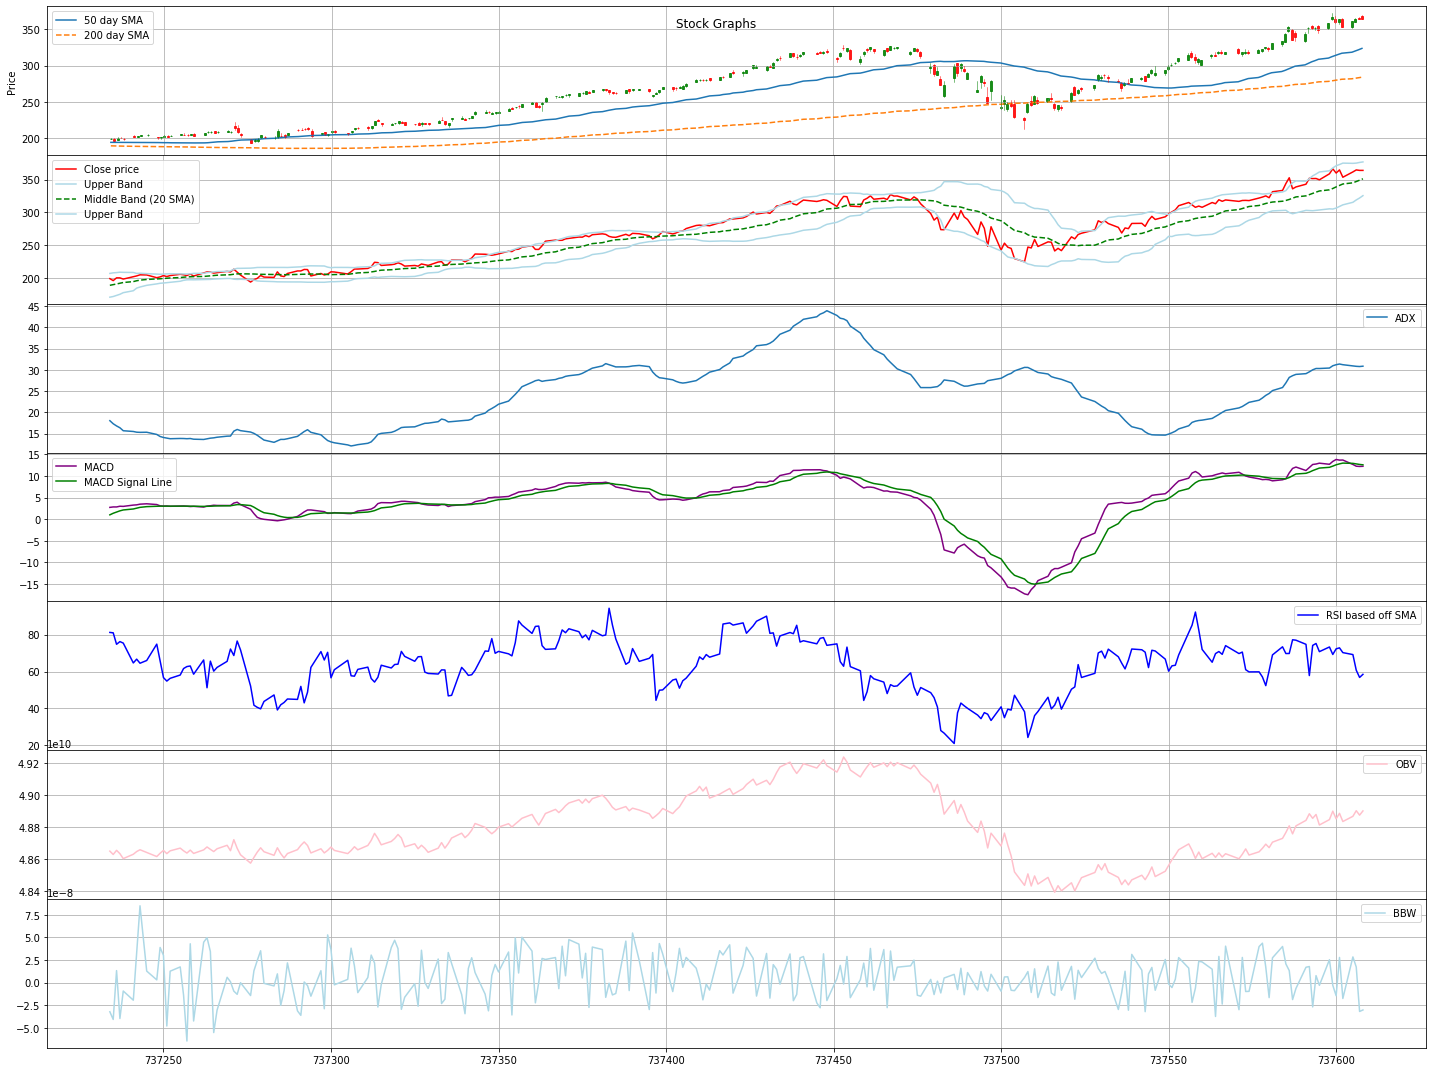

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from mpl_finance import candlestick_ohlc
from matplotlib import gridspec



data1yr = data.tail(260)
ohlc1yr = data1yr.loc[:,['date','open','high','low','close']]
ohlc1yr['date'] = ks.to_datetime(ohlc1yr['date'])
ohlc1yr['date'] = ohlc1yr['date'].apply(mpl_dates.date2num)
ohlc1yr = ohlc1yr.astype(float)
date_format = mpl_dates.DateFormatter('%d-%m-%Y')

# Creating Subplots
fig = plt.figure(figsize=(20, 15), tight_layout=True)
gs = gridspec.GridSpec(nrows=7, ncols=1, figure=fig, hspace=0)

#ax# = fig.add_subplot(gs[#-1, :])
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])
ax4 = fig.add_subplot(gs[3, :])
ax5 = fig.add_subplot(gs[4, :])
ax6 = fig.add_subplot(gs[5, :])
ax7 = fig.add_subplot(gs[6, :])
#create gridlines on subgraphs
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()

#Plotting Candlestick on top of 50 & 200 day SMA
ax1.plot(ohlc1yr['date'], data1yr["open_50SMA"], label= "50 day SMA")
ax1.plot(ohlc1yr['date'], data1yr["open_200SMA"], label= "200 day SMA", linestyle='--')
candlestick_ohlc(ax1, ohlc1yr.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax4.set_xlabel('Date')
ax1.set_ylabel('Price')
fig.suptitle('Stock Graphs')

#Date formatting (only needs to be done on the last axis)
ax4.xaxis.set_major_formatter(date_format)

#fig.autofmt_xdate()

#Plotting 100 day SMA
ax2.plot(ohlc1yr["date"], data1yr["close"], label= "Close price", color="red")

ax2.plot(ohlc1yr["date"], data1yr["upper_band"], label= "Upper Band", color="lightblue")
ax2.plot(ohlc1yr["date"], data1yr["middle_band"], '--', label= "Middle Band (20 SMA)", color="green")
ax2.plot(ohlc1yr["date"], data1yr["lower_band"], label= "Upper Band", color="lightblue")

ax3.plot(ohlc1yr["date"], data1yr["ADX"], label= "ADX")

ax4.plot(ohlc1yr["date"], data1yr["MACD"], label= "MACD", color="purple")
ax4.plot(ohlc1yr["date"], data1yr["MACD_signal_line"], label= "MACD Signal Line", color="green")

ax5.plot(ohlc1yr["date"], data1yr["RSI_SMA"], label= "RSI based off SMA", color="blue")

ax6.plot(ohlc1yr["date"], data1yr["obv"], label= "OBV", color="pink")

ax7.plot(ohlc1yr["date"], data1yr["intraday_intensity_index"], label= "BBW", color="lightblue")

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()

plt.savefig(name+'_Graph.png')


In [ ]:
print("Signal Total:" + str(signal_count))
print("Over Sold Total:" + str(oversold))
print("Over Bought Total:" + str(oversold))
print("ADX Absent Trend Days:" + str(absent))
print("ADX Absent Trend Days:" + str(strong))
print("ADX Absent Trend Days:" + str(extremly_strong))


Signal Total:54
Over Sold Total:988
Over Bought Total:988
ADX Absent Trend Days:6554
ADX Absent Trend Days:3244
ADX Absent Trend Days:117


In [ ]:
plt.savefig(name+'_Graph.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
file1 = open("Stock_Stats.txt","w+")
file1.write(name + ": Signal Total:" + str(signal_count)
            + " Oversold Total:" + str(oversold)
            + " Overbought Total:" + str(overbought)
            + " Absent Trend Days:" + str(absent)
            + " Strong Trend Days:" + str(strong)
            + " Absent Trend Days:" + str(extremly_strong))

139